Analyzing the Steel Plant Faults with Decision Trees
Context
Welcome to the Scaler Industrial Development data analysis team! Our current project aims to improve the quality control process in steel manufacturing. Your expertise is requested to analyze the Steel Plant Faults dataset, utilizing Decision Trees to classify different types of steel plate faults. This task will help in automating the identification of defects and ensuring high standards in steel production.

Dataset Description
The dataset you will analyze includes a variety of attributes that describe defects found in steel plates. These defects are classified into seven distinct categories, each representing a specific type of fault:

Steel Plate Fault Types:
Pastry: Small patches or irregularities on the surface of the steel plate.
Z_Scratch: Narrow, parallel scratches or marks in the direction of rolling.
K_Scratch: Scratches similar to Z-scratches, but perpendicular to the rolling direction.
Stains: Discolored or contaminated areas on the steel surface.
Dirtiness: Presence of dirt or particulate matter on the steel surface.
Bumps: Raised or protruding areas on the steel surface.
Other_Faults: A broad category for faults not specifically mentioned in the other types.

In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/071/024/original/SteelPlant.csv

--2024-11-12 11:26:46--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/071/024/original/SteelPlant.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.158.41.226, 108.158.41.203, 108.158.41.214, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.158.41.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3133750 (3.0M) [text/plain]
Saving to: ‘SteelPlant.csv.1’

SteelPlant.csv.1    100%[===================>]   2.99M  --.-KB/s    in 0.09s   

2024-11-12 11:26:46 (33.1 MB/s) - ‘SteelPlant.csv.1’ saved [3133750/3133750]



In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("SteelPlant.csv")
df.head(2)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1


"""
## Root Entropy for Decision Tree

#### Context:
In a Decision Tree classifier, entropy is a crucial measure used to determine the impurity of a node. In the context of the Steel Plant Faults dataset, understanding how to calculate the root entropy will provide insights into the initial uncertainty before any splits.

#### Task:
Write Python code to transform one-hot encoded fault types into a single 'Target' column and calculate the root entropy. This process involves aggregating multiple binary fault type columns into a single categorical column and then applying the entropy formula.

#### Instructions:
1. **Create the 'Target' Column:** Combine the one-hot encoded fault type columns ('Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults') into a single 'Target' column that contains the fault type with the maximum value for each row.
2. **Entropy Calculation Function:** Define a function `entropy_calc` that calculates the entropy for the 'Target' column, utilizing the probabilities of each fault type.
3. **Compute Root Entropy:** Apply the `entropy_calc` function to the 'Target' column to find the root entropy and print the result.

#### Question:
For this task, how do you transform the one-hot encoded fault types into a single 'Target' column and calculate the root entropy?

"""

In [6]:
import numpy as np

In [7]:
fault_types= df.iloc[:, -7:]
df['Target'] = fault_types.idxmax(axis=1)
df.head(5)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults


In [12]:
def entropy_calc(y:pd.Series):
    probabilities= y.value_counts(normalize= True).to_numpy()
    entropies = -1 * probabilities * np.log2(probabilities)
    return round(np.sum(entropies),2)

In [13]:
## root_entropy is target's entropy since there is no split in to begin with
root_entropy = entropy_calc(df['Target'])
print(f"the root entropy is: {root_entropy}")

the root entropy is: 2.36


"""
Context:
Understanding the distribution of classes in a dataset is essential for machine learning tasks, particularly for classification. The balance or imbalance of the dataset can influence the performance and decision-making process of a Decision Tree (DT) classifier.

Task:
You are asked to write a Python script that visualizes the distribution of classes in the Steel Plant Faults dataset to assess its balance. Based on this analysis, you will determine the necessity of applying imbalance-handling techniques when implementing a DT.

Instructions:
Visualize Class Distribution: Create a bar plot to visualize the count of each fault type ('Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults') in the dataset.
Analyze the Plot: Examine the bar plot to assess whether the dataset is balanced or imbalanced across the different fault types.
Decision Tree Consideration: Decide whether a DT classifier would require imbalance-handling techniques based on the class distribution.
Question:
Based on your analysis of the class distribution in the Steel Plant Faults dataset, is the dataset balanced, and should an imbalance-handling algorithm be applied when implementing a Decision Tree?
"""

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Target'>

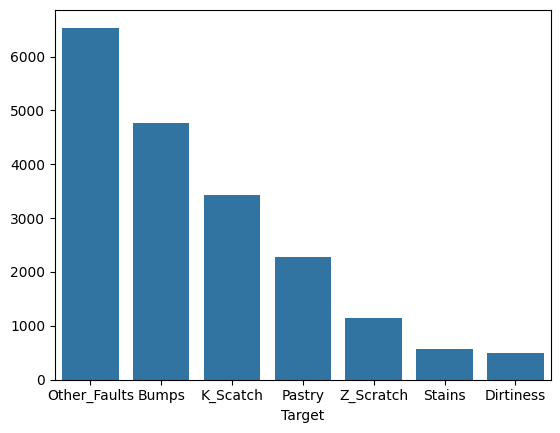

In [20]:
fault_counts= df['Target'].value_counts()

sns.barplot(x= fault_counts.index, y = fault_counts.values)

"""The dataset is imbalanced, and Decision Trees are affected by data imbalance."""

Context:
In a Decision Tree, the root node is pivotal as it represents the initial decision point from which further splits are derived. The Gini value at this node offers insight into the node's purity. This exercise involves training a Decision Tree using only two features from the Steel Plant Faults dataset and determining the root node's feature and its Gini value.

Task:
Train a Decision Tree classifier using 'Pixels_Areas' and 'SigmoidOfAreas' as features. Set the max_depth to 3 and random_state to 42. Determine which feature is chosen as the root node and identify its Gini value.

Instructions:
Feature Selection: Use 'Pixels_Areas' and 'SigmoidOfAreas' as your features for the Decision Tree.
Data Splitting: Split the dataset into training and testing sets.
Model Initialization: Initialize a Decision Tree Classifier with max_depth=3 and random_state=42.
Model Training: Train the Decision Tree on the training data.
Root Node Identification: Identify the feature used at the root node and find its Gini value.
Question:
After training the Decision Tree with the specified hyperparameters using 'Pixels_Areas' and 'SigmoidOfAreas' as features, which feature becomes the root node, and what is its Gini value?

Options:
A) 'Pixels_Areas' is the root node, with a Gini value of X.

B) 'SigmoidOfAreas' is the root node, with a Gini value of Y.

C) Both 'Pixels_Areas' and 'SigmoidOfAreas' share the root node, with Gini values of X and Y respectively.

D) Neither 'Pixels_Areas' nor 'SigmoidOfAreas' becomes the root node.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
x= df[['Pixels_Areas', 'SigmoidOfAreas']]
y = df['Target']

x_train, x_test, y_train, y_test= train_test_split(x, y, random_state = 14)
dt_classifier= DecisionTreeClassifier(max_depth=3, random_state= 42)

dt_classifier.fit(x_train, y_train)

root_feature_index = dt_classifier.tree_.feature[0]
root_node_feature_name = x.columns[root_feature_index]
root_node_gini_impurity = dt_classifier.tree_.impurity[0]
print(f"gini impurity for the root node: {root_node_gini_impurity}")

gini impurity for the root node: 0.7721149494495171


"""Context:
Using class weights in a Decision Tree can help address class imbalance by adjusting the decision criteria toward less represented classes. This task involves applying class weights to a Decision Tree classifier and identifying the class that is most frequently misclassified.

Task:
Write Python code to train a Decision Tree classifier using entropy as the criterion and balanced class weights. Your goal is to determine which class is most misclassified on the test dataset.

Instructions:
Feature and Target Selection: Prepare your features X by dropping the class columns and 'Target', and set y as your 'Target'.
Data Splitting: Split the dataset into training and testing sets using train_test_split with random_state=42.
Class Weights Calculation: Use the 'balanced' option for class weights to handle class imbalance.
Initialize and Train Decision Tree: Create a Decision Tree classifier with entropy criterion, incorporating the calculated class weights. Train this classifier on your training data.
Model Prediction and Evaluation: Use the trained model to predict the classes on the test data. Generate a classification report to evaluate the model's performance across different classes.
Identify Most Misclassified Class: Analyze the recall values from the classification report to identify which class is the most misclassified.
Question:
After applying the described Decision Tree configuration and analyzing the classification report, which class is identified as the most misclassified?

Options:
A) Bumps

B) Other_Faults

C) Dirtiness

D) Pastry
"""

In [43]:
from sklearn.metrics import classification_report, confusion_matrix # need this to understand misclassified class

In [42]:
x = df.drop(columns = df.columns[-8:], axis= 1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 14)
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 14, class_weight='balanced')

dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)

report = classification_report(y_pred, y_test)

print(report)

              precision    recall  f1-score   support

       Bumps       0.40      0.38      0.39      1193
   Dirtiness       0.18      0.17      0.17       128
    K_Scatch       0.84      0.81      0.83       863
Other_Faults       0.39      0.42      0.41      1580
      Pastry       0.23      0.22      0.22       599
      Stains       0.58      0.64      0.61       129
   Z_Scratch       0.45      0.42      0.43       313

    accuracy                           0.46      4805
   macro avg       0.44      0.44      0.44      4805
weighted avg       0.46      0.46      0.46      4805



[[457  30  23 478 147   8  50]
 [ 25  22   2  63  15   0   1]
 [ 31   3 701  97  25   1   5]
 [439  47  79 664 227  42  82]
 [135  18  23 260 131   7  25]
 [  9   0   0  31   6  82   1]
 [ 46   4   7  92  31   1 132]]


<Axes: >

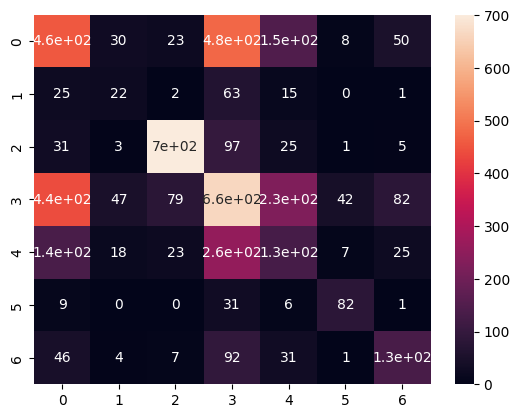

In [45]:
print(confusion_matrix(y_pred, y_test))

sns.heatmap(confusion_matrix(y_pred, y_test), annot= True)